In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Death Rates and Life Expectancy in the U.S.

The mortality data in the U.S. could be downloaded from the CDC's website: https://www.cdc.gov/nchs/nvss/deaths.htm. 

In [2]:
dl_df = pd.read_csv("Death_rates_and_life_expectancy_at_birth.csv")
dl_df.head()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,2015,All Races,Both Sexes,NaN,733.1
1,2014,All Races,Both Sexes,78.9,724.6
2,2013,All Races,Both Sexes,78.8,731.9
3,2012,All Races,Both Sexes,78.8,732.8
4,2011,All Races,Both Sexes,78.7,741.3


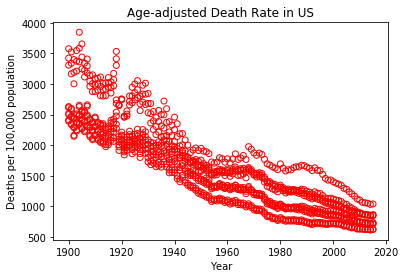

In [3]:
plt.scatter(dl_df['Year'], dl_df['Age-adjusted Death Rate'], facecolors='none', edgecolors='r')
plt.title('Age-adjusted Death Rate in US')
plt.xlabel('Year')
plt.ylabel('Deaths per 100,000 population')
plt.show()

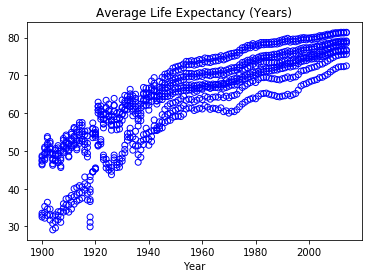

In [4]:
plt.scatter(dl_df['Year'], dl_df['Average Life Expectancy (Years)'], facecolors='none', edgecolors='b')
plt.title('Average Life Expectancy (Years)')
plt.xlabel('Year')
plt.show()

# Leading Causes of Death in the U.S.

This dataset was also downloaded from the CDC's website.

In [5]:
df = pd.read_csv("Leading_Causes_of_Death__US.csv")
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


Cleaning the dataset: (removing reason of death: 'All Causes')

In [6]:
death_causes_df = df[df['113 Cause Name'] != 'All Causes']
death_causes_df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


In [60]:
cause_names = death_causes_df['113 Cause Name'].unique()
years = death_causes_df['Year'].unique()

# Leading Causes of Deaths in the U.S.

In [8]:
def leading_death_causes(data, causes):

    reason_for_deaths = []
    
    for i in causes:
        cause = data.loc[(data['113 Cause Name']==i)]
        cause_amt = cause['Deaths'].sum()
        reason_for_deaths.append(cause_amt)
    
    return reason_for_deaths

In [9]:
def leading_causes_yr(data, causes):
    
    for yr in years:
        yr_df = data.loc[(data['Year']==yr)]
        by_yr = leading_death_causes(yr_df, causes)
    
        plt.title('Leading Causes of Deaths in the US in %s' %yr)
        plt.xlabel('Number of Deaths')
        death_plt = plt.barh(cause_names, by_yr)
        plt.show()
    
    return death_plt

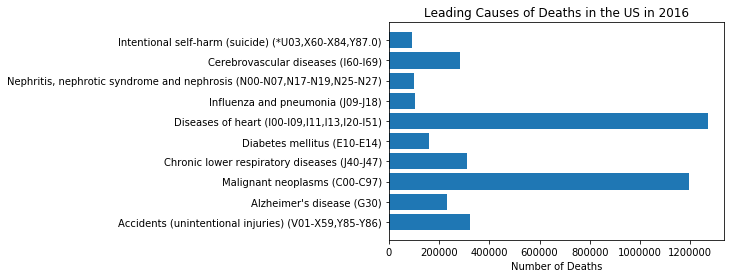

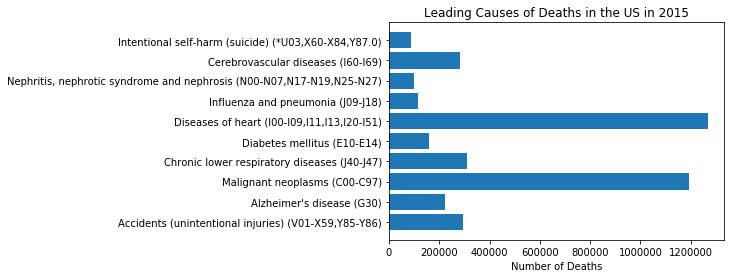

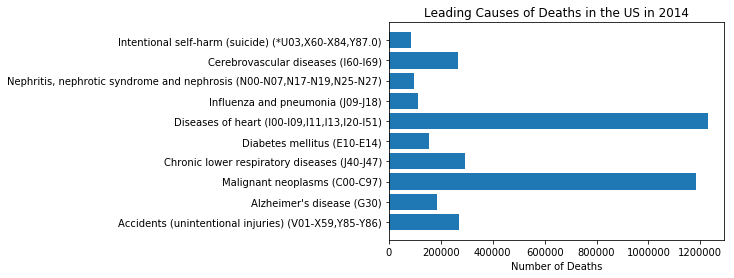

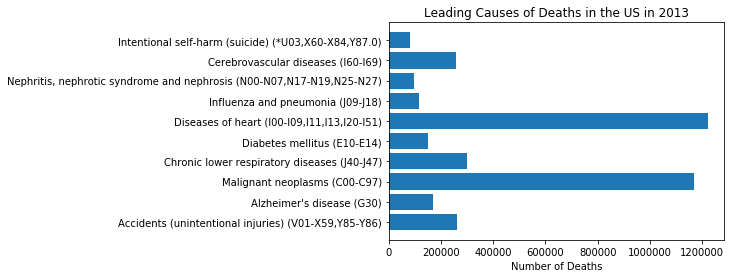

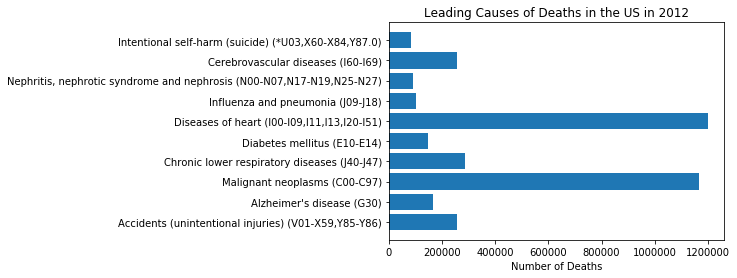

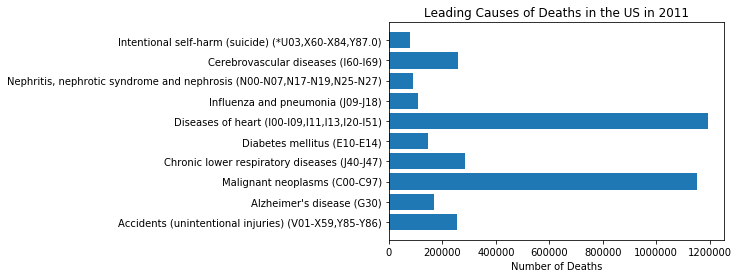

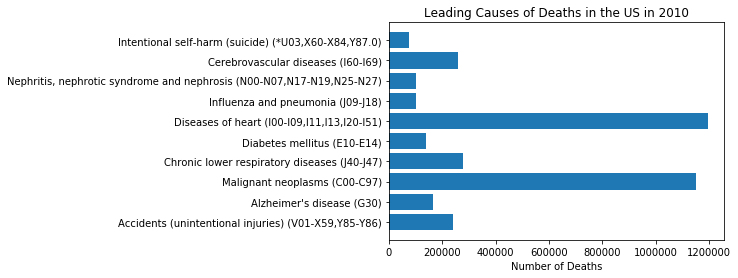

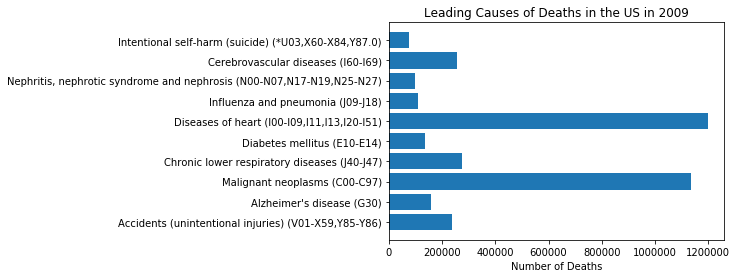

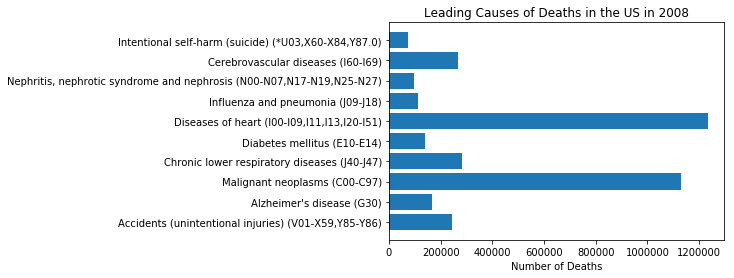

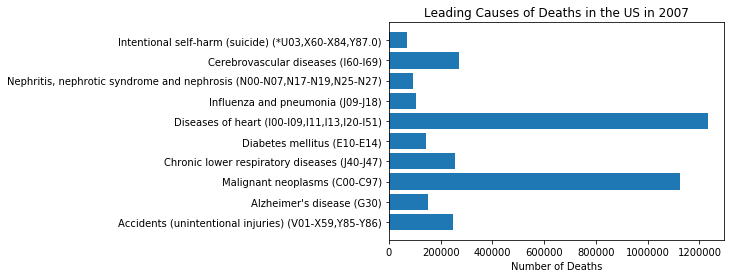

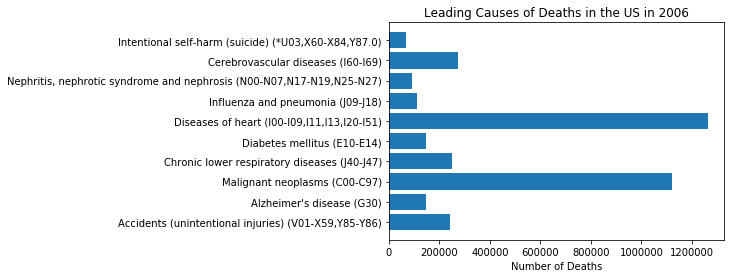

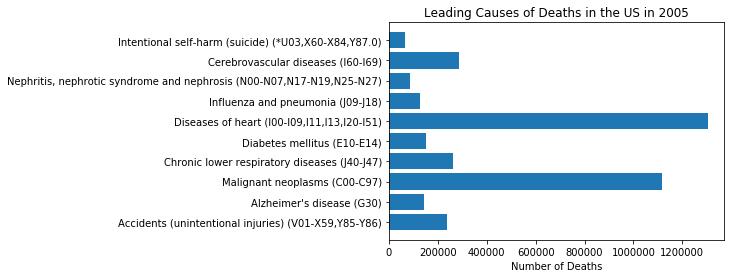

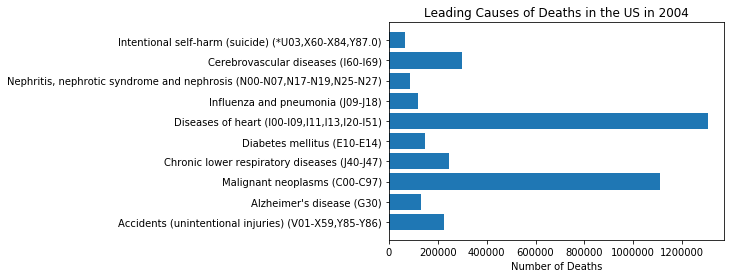

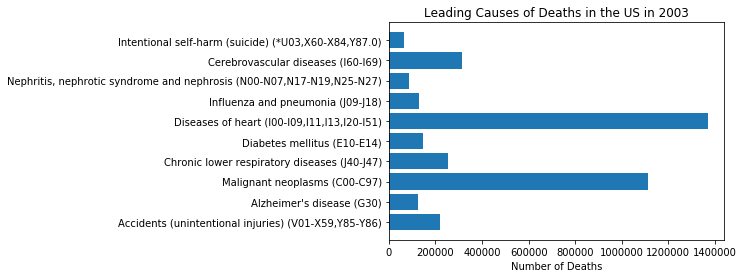

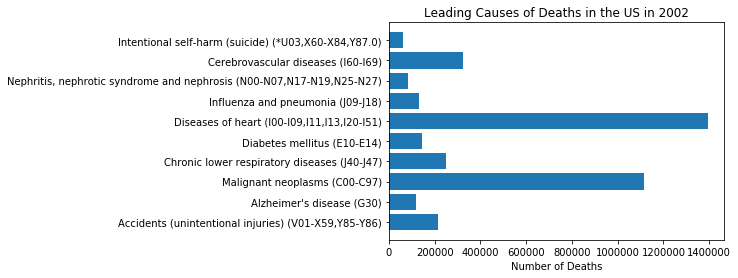

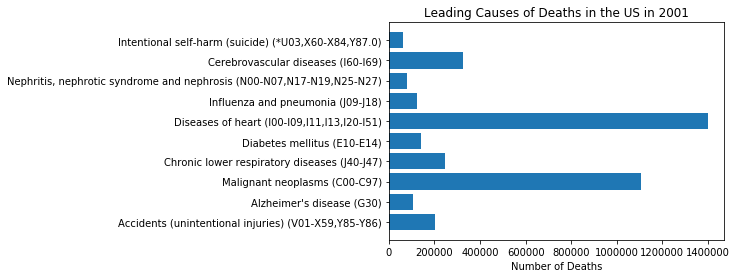

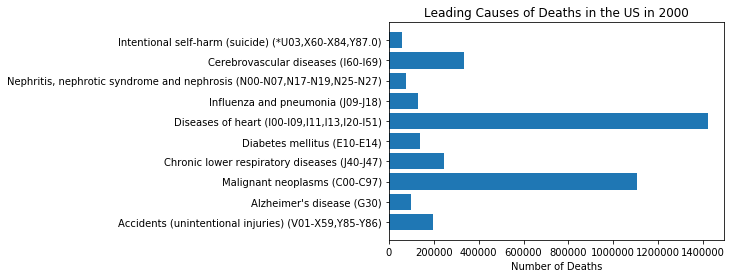

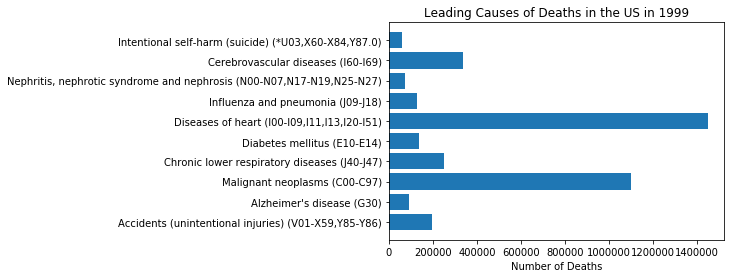

<BarContainer object of 10 artists>

In [10]:
leading_causes_yr(death_causes_df, cause_names)